In [1]:
import mlflow
import boto3
import awscli

In [2]:
mlflow.set_tracking_uri("http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/")


In [3]:
mlflow.set_experiment("Exp3 TFIdf Trigram max features")

2025/12/13 14:42:52 INFO mlflow.tracking.fluent: Experiment with name 'Exp3 TFIdf Trigram max features' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://sentiment-analysis-bucket-alqud/mlflow-artifacts/4', creation_time=1765597371731, experiment_id='4', last_update_time=1765597371731, lifecycle_stage='active', name='Exp3 TFIdf Trigram max features', tags={}>

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [5]:
df= pd.read_csv("reddit_prepocessing.csv").dropna(subset=["clean_comment"])

2025/12/13 14:52:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_1000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/f13f469a79554e1797b032b411b23b63
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:53:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_2000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/1647efbb1e8c48e8930f3070b17e1b95
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:54:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_3000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/0d54858f0d364da5b81928577e20e31e
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:55:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_4000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/23edcafb84da43a783a2f50786e2ea75
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:56:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_5000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/8052b91bd3ac43c29f9de13c91b9796f
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:57:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_6000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/3afc50d4e7aa4a51893e50abd447fdcb
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:57:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_7000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/965e43b2032a46a8a1cc6317e5ea28b1
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:58:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_8000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/516ad43deb134a8fb38e9f82ffff0c1b
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 14:59:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_9000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/e69398b910624e1ba6f8ede56ab39d6b
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


2025/12/13 15:00:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run TFIDF_Trigrams_max_features_10000 at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4/runs/5ff82265ed6d45f5885db2bd727e62d7
🧪 View experiment at: http://ec2-3-107-229-149.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/4


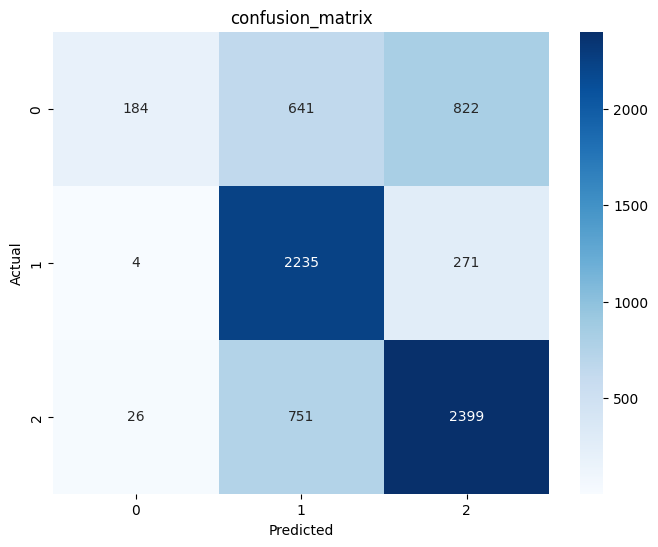

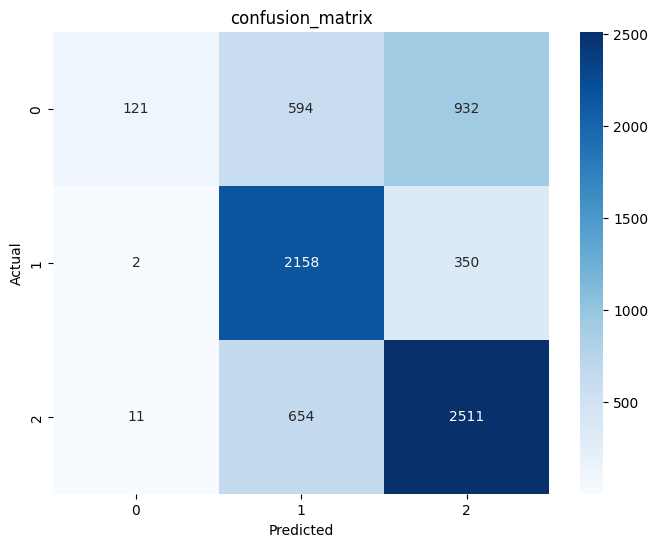

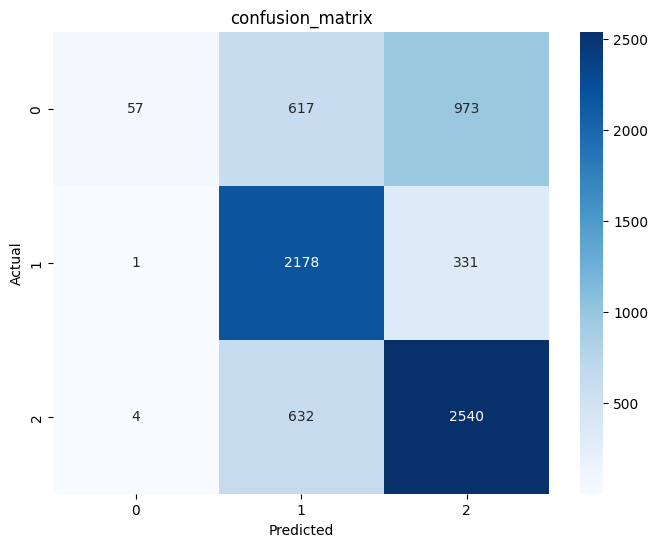

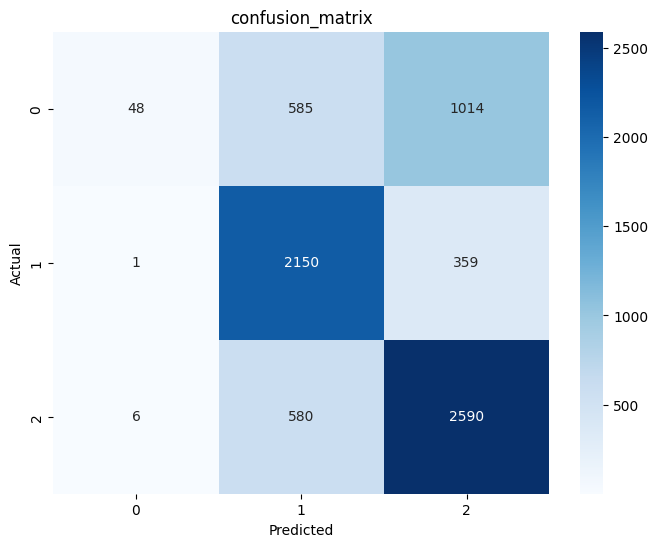

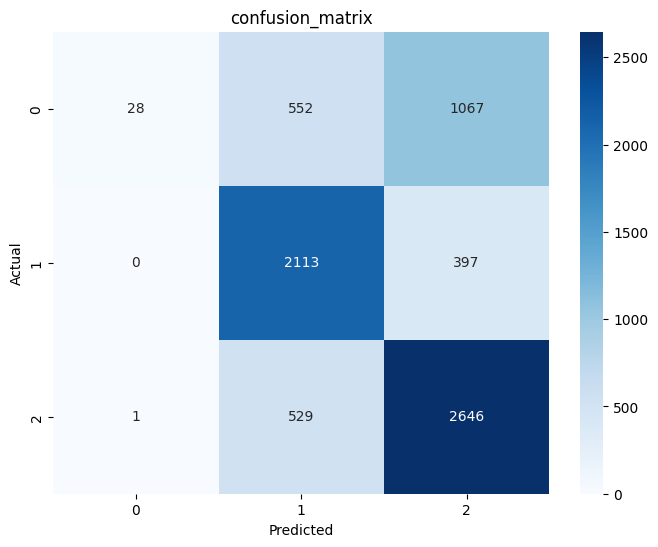

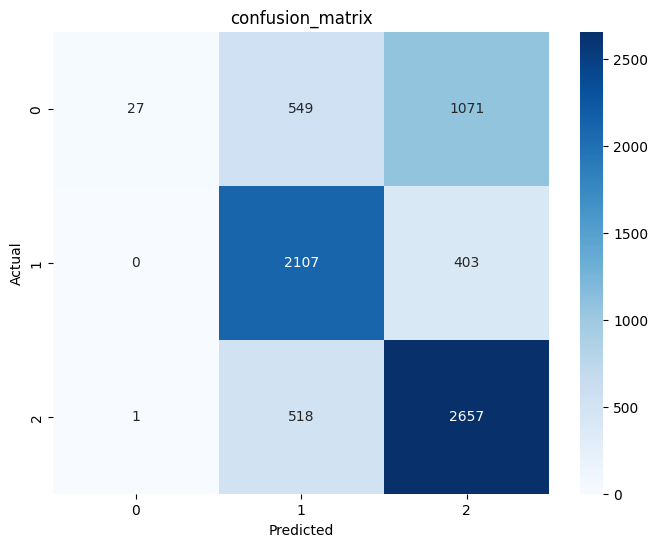

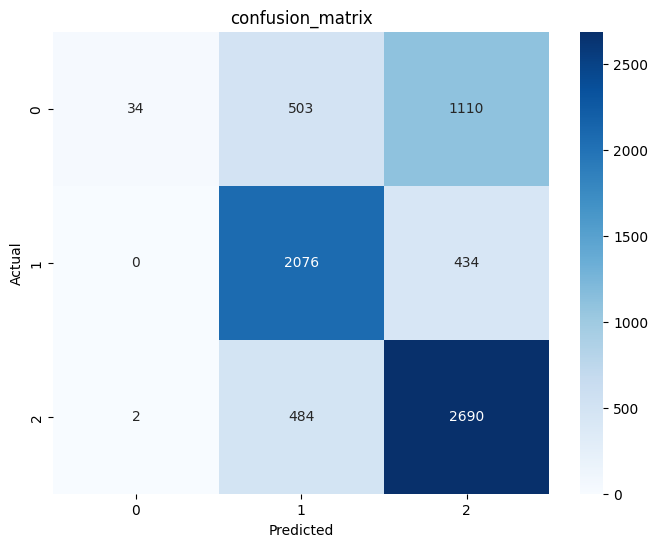

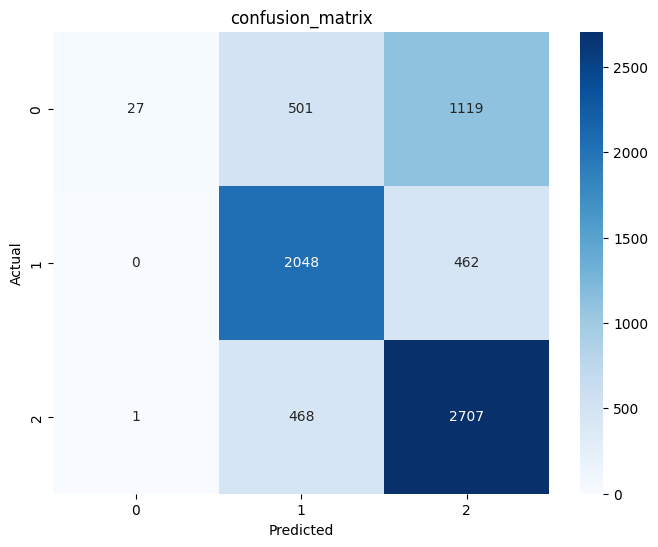

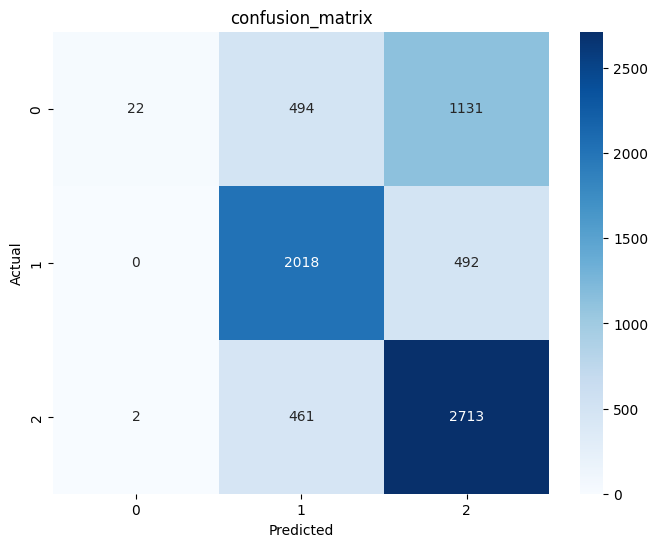

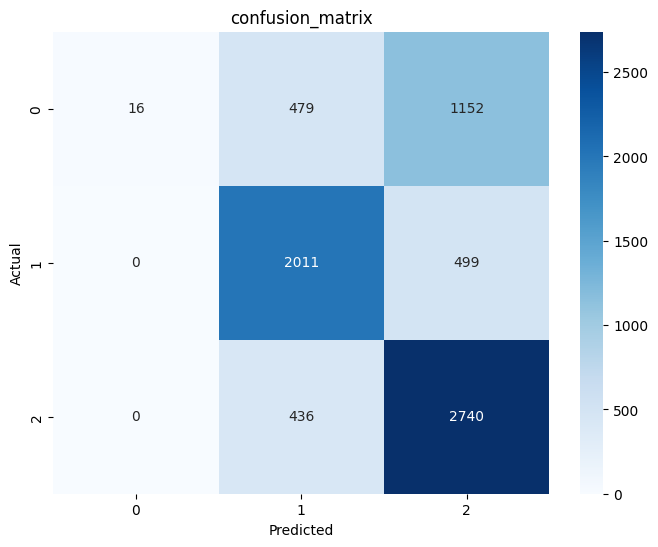

In [7]:
def run_experiment_tfidf_max_features(max_features):
    
    ngram_range = (1,3)
    vectorizer= TfidfVectorizer(ngram_range=ngram_range,max_features=max_features)

    X_train,X_test,y_train,y_test = train_test_split(df["clean_comment"],df['category'],test_size=0.2,random_state=42)

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName",f"TFIDF_Trigrams_max_features_{max_features}")
        mlflow.set_tag("experiment_type", "feature_engineering")
        mlflow.set_tag("model_type", "RandomForestClassifier")

        mlflow.set_tag("description",f"RandomForest with TF_IDF Trigrams  max_features={max_features}")

        mlflow.log_param("vectorizer_type","TF-IDF")
        mlflow.log_param("ngram_range",ngram_range)
        mlflow.log_param("vectorizer_max_features",max_features)

        n_estimators =200
        max_depth=15

        mlflow.log_param("n_estimators",n_estimators)
        mlflow.log_param("max_depth",max_depth)

        model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test,y_pred)
        mlflow.log_metric("accuracy",accuracy)

        classification_rep = classification_report(y_test,y_pred,output_dict=True)

        for label, metrics in classification_rep.items():
            if isinstance(metrics,dict):
                for metric ,value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}",value)

        conf_matrix = confusion_matrix(y_test,y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("confusion_matrix")

        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        

        mlflow.sklearn.log_model(model,f"random_forest_model_tfidf_trigrams_{max_features}")




max_features =[i for i in range(1000,10001,1000)]
for max_feature in max_features:
    run_experiment_tfidf_max_features(max_feature)




